In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import arviz as az
import pymc as pm
import pytensor.tensor as pt
import scipy.stats as stats
import scipy as sp
from scipy.stats import skewnorm

In [3]:
def dataimporter(filename,header=70):
    # Reading in the data file, removing header and converting it to a matrix
    data = pd.read_csv(filename, header=header)
    nummer = data.to_numpy()
    nummerdata = np.asarray(nummer[:-1,:], dtype="float")
    
    # for i in ([nummerdata]):
    #     under=2.2
    #     over=2.6
    #     avgunder=2.65
    #     avgover=2.8
        
    #     intunder = np.where(i[:,0]==find_nearest(i[:,0],under))
    #     intover = np.where(i[:,0]==find_nearest(i[:,0],over))
    #     placeunder = np.where(i[:,0]==find_nearest(i[:,0],avgunder))
    #     placeover = np.where(i[:,0]==find_nearest(i[:,0],avgover))
        
    #     intunder = np.reshape(intunder,-1)
    #     intover = np.reshape(intover,-1)
    #     placeunder = np.reshape(placeunder, -1)
    #     placeover = np.reshape(placeover, -1)

    #     i[:,1] = i[:,1]-np.average(i[placeunder[0]:placeover[0],1])

        
    
    return nummerdata
def plotter(ax,data,zo,colour,label,alpha = 1):
    # Function to plot spectrum
    ax.plot(data[:,0],data[:,1],zorder=zo, lw = 4, color = colour, label =label,alpha=alpha)
    ax.fill_between(data[:,0],data[:,1],zorder=zo, color = colour,alpha=alpha)
   
def find_nearest(array, value):
    # Function for finding closest value in array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def data_integration(data,under=2.2,over=2.6,avgunder=2.65,avgover=2.8 ):
    # Function to integrate the data between energies
    array = np.array([])
    for i in (data):
        intunder = np.where(i[:,0]==find_nearest(i[:,0],under))
        intover = np.where(i[:,0]==find_nearest(i[:,0],over))
        placeunder = np.where(i[:,0]==find_nearest(i[:,0],avgunder))
        placeover = np.where(i[:,0]==find_nearest(i[:,0],avgover))
        
        intunder = np.reshape(intunder,-1)
        intover = np.reshape(intover,-1)
        placeunder = np.reshape(placeunder, -1)
        placeover = np.reshape(placeover, -1)

        # i[:,1] = i[:,1]-np.average(i[placeunder[0]:placeover[0],1])

        top1 = np.sum(i[intunder[0]:intover[0],1])
        array = np.append(array,top1)
    return array

def predict(signal,c):
    return c[0]*signal + c[1]

def readfile(arraynames):
    # Funstion to make it possible to import multiple files at the same time
    meaner = np.array([])
    for i in arraynames:
        temp = dataimporter(i)
        meaner = np.append(meaner,data_integration([temp]))
    return meaner

In [4]:
# Old way of importing data
N15_10keV_60_1 = dataimporter("Measurements 090724/N15_10k_60_1.txt")
N15_10keV_60_2 = dataimporter("Measurements 090724/N15_10k_60_2.txt")
N15_10keV_60_3 = dataimporter("Measurements 090724/N15_10k_60_3.txt")
N15_10keV_60_4 = dataimporter("Measurements 090724/N15_10k_60_4.txt")
N15_10keV_60_5 = dataimporter("Measurements 090724/N15_10k_60_5.txt")

N8_10keV_60_1 = dataimporter("Measurements 090724/N8_10k_60_1.txt")
N8_10keV_60_2 = dataimporter("Measurements 090724/N8_10k_60_2.txt")
N8_10keV_60_3 = dataimporter("Measurements 090724/N8_10k_60_3.txt")

E7_10keV_60_1 = dataimporter("Measurements 090724/E7_10k_60_1.txt")
E7_10keV_60_2 = dataimporter("Measurements 090724/E7_10k_60_2.txt")
E7_10keV_60_3 = dataimporter("Measurements 090724/E7_10k_60_3.txt")

D9_10keV_60_1 = dataimporter("Measurements 090724/D9_10k_60_1.txt")
D9_10keV_60_2 = dataimporter("Measurements 090724/D9_10k_60_2.txt")
D9_10keV_60_3 = dataimporter("Measurements 090724/D9_10k_60_3.txt")

C10_10keV_60_1 = dataimporter("Measurements 090724/C10_10k_60_1.txt")
C10_10keV_60_2 = dataimporter("Measurements 090724/C10_10k_60_2.txt")
C10_10keV_60_3 = dataimporter("Measurements 090724/C10_10k_60_3.txt")

N15_10K_0908 = np.array([N15_10keV_60_1,N15_10keV_60_2,N15_10keV_60_3,N15_10keV_60_3,N15_10keV_60_5])
N8_10keV_0908 = np.array([N8_10keV_60_1,N8_10keV_60_2,N8_10keV_60_3])
E7_10keV_0908 = np.array([E7_10keV_60_1,E7_10keV_60_2,E7_10keV_60_3])
D9_10keV_0908 = np.array([D9_10keV_60_1,D9_10keV_60_2,D9_10keV_60_3])
C10_10keV_0908 = np.array([C10_10keV_60_1,C10_10keV_60_2,C10_10keV_60_3])

N15_10K_0908_t = np.repeat(120,len(N15_10K_0908))
N8_10keV_0908_t = np.repeat(15,len(N8_10keV_0908))
E7_10keV_0908_t = np.repeat(1,len(E7_10keV_0908))
D9_10keV_0908_t = np.repeat(45,len(D9_10keV_0908))
C10_10keV_0908_t = np.repeat(45,len(C10_10keV_0908))

spec0908 = np.concatenate((data_integration(N15_10K_0908),data_integration(N8_10keV_0908),data_integration(D9_10keV_0908),data_integration(C10_10keV_0908)))
thick0908 = np.concatenate((N15_10K_0908_t,N8_10keV_0908_t,D9_10keV_0908_t,C10_10keV_0908_t))
specdata_0908 = np.array([spec0908,thick0908])
specdata_0908 = specdata_0908.T

In [5]:
# old data importing
A10_15k_110724_1 = dataimporter("Measurements 110724/A10_15k_110724_1.txt",header=65)
A10_15k_110724_2 = dataimporter("Measurements 110724/A10_15k_110724_2.txt",header=65)
A10_15k_110724_3 = dataimporter("Measurements 110724/A10_15k_110724_3.txt",header=65)

B15_10k_100724_1 = dataimporter("Measurements 100724/B15_10k_100724_1.txt",header=65)
B15_10k_100724_2 = dataimporter("Measurements 100724/B15_10k_100724_2.txt",header=65)
B15_10k_100724_3 = dataimporter("Measurements 100724/B15_10k_100724_3.txt",header=65)

B15_10k_100724_A2_1 = dataimporter("Measurements 100724/B15_10k_100724_A2_1.txt",header=65)
B15_10k_100724_A2_2 = dataimporter("Measurements 100724/B15_10k_100724_A2_2.txt",header=65)
B15_10k_100724_A2_3 = dataimporter("Measurements 100724/B15_10k_100724_A2_3.txt",header=65)

B15_15k_100724_1 = dataimporter("Measurements 100724/B15_15k_100724_1.txt",header=65)
B15_15k_100724_2 = dataimporter("Measurements 100724/B15_15k_100724_2.txt",header=65)
B15_15k_100724_3 = dataimporter("Measurements 100724/B15_15k_100724_3.txt",header=65)

C10_10k_100724_1 = dataimporter("Measurements 100724/C10_10k_100724_1.txt",header=65)
C10_10k_100724_2 = dataimporter("Measurements 100724/C10_10k_100724_2.txt",header=65)
C10_10k_100724_3 = dataimporter("Measurements 100724/C10_10k_100724_3.txt",header=65)

C10_15k_100724_1 = dataimporter("Measurements 100724/C10_15k_100724_1.txt",header=65)
C10_15k_100724_2 = dataimporter("Measurements 100724/C10_15k_100724_2.txt",header=65)
C10_15k_100724_3 = dataimporter("Measurements 100724/C10_15k_100724_3.txt",header=65)

C10_10k_100724_A2_1 = dataimporter("Measurements 100724/C10_10k_100724_A2_1.txt",header=65)
C10_10k_100724_A2_2 = dataimporter("Measurements 100724/C10_10k_100724_A2_2.txt",header=65)
C10_10k_100724_A2_3 = dataimporter("Measurements 100724/C10_10k_100724_A2_3.txt",header=65)

C10_15k_100724_A2_1 = dataimporter("Measurements 100724/C10_15k_100724_A2_1.txt",header=65)
C10_15k_100724_A2_2 = dataimporter("Measurements 100724/C10_15k_100724_A2_2.txt",header=65)
C10_15k_100724_A2_3 = dataimporter("Measurements 100724/C10_15k_100724_A2_3.txt",header=65)

D9_10k_100724_1 = dataimporter("Measurements 100724/D9_10k_100724_1.txt",header=65)
D9_10k_100724_2 = dataimporter("Measurements 100724/D9_10k_100724_2.txt",header=65)
D9_10k_100724_3 = dataimporter("Measurements 100724/D9_10k_100724_3.txt",header=65)

D9_15k_100724_1 = dataimporter("Measurements 100724/D9_15k_100724_1.txt",header=65)
D9_15k_100724_2 = dataimporter("Measurements 100724/D9_15k_100724_2.txt",header=65)
D9_15k_100724_3 = dataimporter("Measurements 100724/D9_15k_100724_3.txt",header=65)

H12_10k_100724_1 = dataimporter("Measurements 100724/H12_10k_100724_1.txt",header=65)

H12_15k_100724_1 = dataimporter("Measurements 100724/H12_15k_100724_1.txt",header=65)

H9_15k_100724_1 = dataimporter("Measurements 100724/H9_15k_100724_1.txt",header=65)
H9_10k_100724_1 = dataimporter("Measurements 100724/H9_10k_100724_1.txt",header=65)

N8_10k_100724_1 = dataimporter("Measurements 100724/N8_10k_100724_1.txt",header=65)
N8_10k_100724_2 = dataimporter("Measurements 100724/N8_10k_100724_2.txt",header=65)
N8_10k_100724_3 = dataimporter("Measurements 100724/N8_10k_100724_3.txt",header=65)

N15_10k_100724_1 = dataimporter("Measurements 100724/N15_10k_100724_1.txt",header=65)
N15_10k_100724_2 = dataimporter("Measurements 100724/N15_10k_100724_2.txt",header=65)
N15_10k_100724_3 = dataimporter("Measurements 100724/N15_10k_100724_3.txt",header=65)

N15_15k_100724_1 = dataimporter("Measurements 100724/N15_15k_100724_1.txt",header=65)
N15_15k_100724_2 = dataimporter("Measurements 100724/N15_15k_100724_2.txt",header=65)
N15_15k_100724_3 = dataimporter("Measurements 100724/N15_15k_100724_3.txt",header=65)

C15_10k_2_100724_1 = dataimporter("Measurements 100724/C15_10k_2_100724_1.txt",header=65)
C15_15k_2_100724_1 = dataimporter("Measurements 100724/C15_15k_2_100724_1.txt",header=65)

C15_10k_100724 = dataimporter("Measurements 100724/C15_10k_100724.txt",header=65)
C15_15k_1_100724_1 = dataimporter("Measurements 100724/C15_15k_1_100724_1.txt",header=65)

F14_10k_100724 = dataimporter("Measurements 100724/F14_10k_100724_1.txt",header=65)



spec1007_10 = np.array([])
thick1007_10 = np.array([])
spec1007_15 = np.array([])
thick1007_15 = np.array([])
specavg = np.array([])
yerror = np.array([])
xerror = np.array([])

# Creating pandas data frames
spectraldata15 = pd.DataFrame(columns=["tcps","thickness","thicknesserror","tcpserror"])
spectraldata10 = pd.DataFrame(columns=["tcps","thickness","thicknesserror","tcpserror"])

spectraldata15points = pd.DataFrame(columns=["tcps","thickness","thicknesserror","tcpserror"])
spectraldata10points = pd.DataFrame(columns=["tcps","thickness","thicknesserror","tcpserror"])

# newer data importing
H12_10k = data_integration([H12_10k_100724_1])
H12_15k = data_integration([H12_10k_100724_1])
spectraldata10.loc["H12 Area 1"] = [H12_10k[0],7.019819680052666e-08,7.352929558938202e-12,(np.max(H12_10k)-np.min(H12_10k))/2]
spectraldata15.loc["H12 Area 1"] = [H12_15k[0],7.019819680052666e-08,7.352929558938202e-12,(np.max(H12_15k)-np.min(H12_15k))/2]


A10_15keV_110724 = data_integration([A10_15k_110724_2,A10_15k_110724_1,A10_15k_110724_3])
A10_thickness_15 = np.repeat(680,len(A10_15keV_110724))
spec1007_15 = np.append(spec1007_15,A10_15keV_110724)
thick1007_15 = np.append(thick1007_15,A10_thickness_15)

spectraldata15points.loc["A10 Area 1"] = [np.mean(A10_15keV_110724),6.77603162563611e-07,2e-10,(np.max(A10_15keV_110724)-np.min(A10_15keV_110724))/2]

F14_10k_100724 = data_integration([F14_10k_100724])
F14_thick_15 = np.repeat(160,len(F14_10k_100724))
# spec1007_10 = np.append(thick1007_10,F14_10k_100724)
# thick1007_10 = np.append(thick1007_10,F14_thick_15)

C15_10k_100724_A1 = data_integration([C15_10k_100724])
C15A1_thickness_10 = np.repeat(220,len(C15_10k_100724_A1))
# 2.507745896825397e-07
# spectraldata10.loc["C15 Area 1"] = [C15_10k_100724_A1[0],2.507745896825397e-07,0,(np.max(C15_10k_100724_A1)-np.min(C15_10k_100724_A1))/2]

C15_10k_100724_A2 = data_integration([C15_10k_2_100724_1])
C15A2_thickness_10 = np.repeat(147,len(C15_10k_100724_A2))
spec1007_10 = np.append(spec1007_10,np.concatenate((C15_10k_100724_A1,C15_10k_100724_A2)))
thick1007_10 = np.append(thick1007_10,np.concatenate((C15A1_thickness_10,C15A2_thickness_10)))
spectraldata10.loc["C15 Area 2"] = [C15_10k_100724_A2[0],1.5232782994124567e-07,0,(np.max(C15_10k_100724_A2)-np.min(C15_10k_100724_A2))/2]

C15_15k_100724_A1 = data_integration([C15_15k_1_100724_1])
C15A1_thickness_15 = np.repeat(220,len(C15_15k_100724_A1))
C15_15k_100724_A2 = data_integration([C15_15k_2_100724_1])
C15A2_thickness_15 = np.repeat(147,len(C15_15k_100724_A2))
spec1007_15 = np.append(spec1007_15,np.concatenate((C15_15k_100724_A1,C15_15k_100724_A2)))
thick1007_15 = np.append(thick1007_15,np.concatenate((C15A1_thickness_15,C15A2_thickness_15)))

B15_10k_100724 = data_integration([B15_10k_100724_1,B15_10k_100724_2,B15_10k_100724_3])
B15_10k_100724_A2 = data_integration([B15_10k_100724_A2_1,B15_10k_100724_A2_2,B15_10k_100724_A2_3])
B15A1_thick_10 = np.repeat(59.1,len(B15_10k_100724))
B15A2_thick_10 = np.repeat(12,len(B15_10k_100724_A2))
spec1007_10 = np.append(spec1007_10,np.concatenate((B15_10k_100724,B15_10k_100724_A2)))
thick1007_10 = np.append(thick1007_10,np.concatenate((B15A1_thick_10,B15A2_thick_10)))
# spectraldata10.loc["B15 Area 1"] = [np.mean(B15_10k_100724),5.763391e-08,0,(np.max(B15_10k_100724)-np.min(B15_10k_100724))/2]
# spectraldata10.loc["B15 Area 2"] = [np.mean(B15_10k_100724_A2),4.727011458370342e-08,6.7952968476364225e-09,(np.max(C10_15k_100724)-np.min(C10_15k_100724))/2]


B15_15k_100724 = data_integration([B15_15k_100724_1,B15_15k_100724_2,B15_15k_100724_3])
B15A1_thick_15 = np.repeat(59.1,len(B15_15k_100724))
spec1007_15 = np.append(spec1007_15,B15_15k_100724)
thick1007_15 = np.append(thick1007_15,B15A1_thick_15)

C10_10k_100724 = data_integration([C10_10k_100724_1,C10_10k_100724_2,C10_10k_100724_3])
C10_15k_100724 = data_integration([C10_15k_100724_1,C10_15k_100724_2,C10_15k_100724_3])
C10A1_thickness_10 = np.repeat(47.3,len(C10_10k_100724))
C10A1_thickness_15 = np.repeat(47.3,len(C10_15k_100724))
spec1007_15 = np.append(spec1007_15,C10_15k_100724)
thick1007_15 = np.append(thick1007_15,C10A1_thickness_15)
spec1007_10 = np.append(spec1007_10,C10_10k_100724)
thick1007_10 = np.append(thick1007_10,C10A1_thickness_10)
spectraldata10.loc["C10 Area 1"] = [np.mean(C10_10k_100724),5.472002590182196e-08,2.6796075100419003e-10,(np.max(C10_10k_100724)-np.min(C10_10k_100724))/2]
spectraldata15.loc["C10 Area 1"] = [np.mean(C10_15k_100724),5.472002590182196e-08,2.6796075100419003e-10,(np.max(C10_15k_100724)-np.min(C10_15k_100724))/2]

C10_10k_100724_A2 = data_integration([C10_10k_100724_A2_1,C10_10k_100724_A2_2,C10_10k_100724_A2_3])
C10_15k_100724_A2 = data_integration([C10_15k_100724_A2_1,C10_15k_100724_A2_2,C10_15k_100724_A2_3])
C10A2_thickness_10 = np.repeat(58.166,len(C10_10k_100724_A2))
C10A2_thickness_15 = np.repeat(58.166,len(C10_15k_100724_A2))
spec1007_10 = np.append(spec1007_10,C10_10k_100724_A2)
thick1007_10 = np.append(thick1007_10,C10A2_thickness_10)
spec1007_15 = np.append(spec1007_15,C10_15k_100724_A2)
thick1007_15 = np.append(thick1007_15,C10A2_thickness_15)
spectraldata10.loc["C10 Area 2"] = [np.mean(C10_10k_100724_A2),6.621983698283349e-08,1.3301237713190631e-11,(np.max(C10_10k_100724_A2)-np.min(C10_10k_100724_A2))/2]
spectraldata15.loc["C10 Area 2"] = [np.mean(C10_15k_100724_A2),6.621983698283349e-08,4.768952002078188e-11,(np.max(C10_15k_100724_A2)-np.min(C10_15k_100724_A2))/2]


H9_10k_100724 = data_integration([H9_10k_100724_1])
H9_15k_100724 = data_integration([H9_15k_100724_1])
H9A1_thickness_10 = np.repeat(220,len(H9_10k_100724))
H9A1_thickness_15 = np.repeat(220,len(H9_15k_100724))
spec1007_10 = np.append(spec1007_10,H9_10k_100724)
thick1007_10 = np.append(thick1007_10,H9A1_thickness_10)
spec1007_15 = np.append(spec1007_15,H9_15k_100724)
thick1007_15 = np.append(thick1007_15,H9A1_thickness_15)
# spectraldata10.loc["H9 Area 1"] = [np.mean(H9_10k_100724),2.3437525949463097e-07,6.465786941306329e-10,(np.max(H9_10k_100724)-np.min(H9_10k_100724))/2]
# spectraldata15.loc["H9 Area 1"] = [np.mean(H9_15k_100724),2.3437525949463097e-07,6.465786941306329e-10,(np.max(H9_15k_100724)-np.min(H9_15k_100724))/2]

D9_10k_100724 = data_integration([D9_10k_100724_1,D9_10k_100724_2,D9_10k_100724_3])
D9_15k_100724 = data_integration([D9_15k_100724_1,D9_15k_100724_2,D9_15k_100724_3])
D9_thickness_10 = np.repeat(8,len(D9_10k_100724))
D9_thickness_15 = np.repeat(8,len(D9_15k_100724))
spec1007_10 = np.append(spec1007_10,D9_10k_100724)
thick1007_10 = np.append(thick1007_10,D9_thickness_10)
spec1007_15 = np.append(spec1007_15,D9_15k_100724)
thick1007_15 = np.append(thick1007_15,D9_thickness_15)
spectraldata10.loc["D9 Area 1"] = [np.mean(D9_10k_100724),8.935509295988247e-09,1.3226966576479678e-11,(np.max(D9_10k_100724)-np.min(D9_10k_100724))/2]
spectraldata15.loc["D9 Area 1"] = [np.mean(D9_15k_100724),8.935509295988247e-09,1.3226966576479678e-11,(np.max(D9_15k_100724)-np.min(D9_15k_100724))/2]

N8_10k_100724 = data_integration([N8_10k_100724_1,N8_10k_100724_2,N8_10k_100724_3])
N8_thickness_10 = np.repeat(15,len(N8_10k_100724))
spec1007_10 = np.append(spec1007_10,N8_10k_100724)
thick1007_10 = np.append(thick1007_10,N8_thickness_10)
spectraldata10.loc["N8 Area 1"] = [np.mean(N8_10k_100724),1.4763913340391209e-08,1.3226966576479678e-11,(np.max(N8_10k_100724)-np.min(N8_10k_100724))/2]

N15_10k_100724 = data_integration([N15_10k_100724_1,N15_10k_100724_2,N15_10k_100724_3])
N15_15k_100724 = data_integration([N15_15k_100724_1,N15_15k_100724_2,N15_15k_100724_3])
N15_thickness_10 = np.repeat(120,len(N15_10k_100724))
N15_thickness_15 = np.repeat(120,len(N15_15k_100724))
spec1007_10 = np.append(spec1007_10,N15_10k_100724)
thick1007_10 = np.append(thick1007_10,N15_thickness_10)
spec1007_15 = np.append(spec1007_15,N15_15k_100724)
thick1007_15 = np.append(thick1007_15,N15_thickness_15)
spectraldata10.loc["N15 Area 1"] = [np.mean(N15_10k_100724),1.1991117601449273e-07,1.5516981225296182e-10,(np.max(N15_10k_100724)-np.min(N15_10k_100724))/2]
spectraldata15.loc["N15 Area 1"] = [np.mean(N15_15k_100724),1.1991117601449273e-07,1.5516981225296182e-10,(np.max(N15_15k_100724)-np.min(N15_15k_100724))/2]

specdata_1007_10 = np.array([spec1007_10,thick1007_10])
specdata_1007_10 = specdata_1007_10.T

specdata_1007_15 = np.array([spec1007_15,thick1007_15])
specdata_1007_15 = specdata_1007_15.T
print(spectraldata10)
print(spectraldata15)

                    tcps     thickness  thicknesserror  tcpserror
H12 Area 1  12048.000000  7.019820e-08    7.352930e-12        0.0
C15 Area 2  24766.000000  1.523278e-07    0.000000e+00        0.0
C10 Area 1   9269.000000  5.472003e-08    2.679608e-10      282.0
C10 Area 2  11097.333333  6.621984e-08    1.330124e-11      135.5
D9 Area 1    2045.000000  8.935509e-09    1.322697e-11      116.0
N8 Area 1    3430.000000  1.476391e-08    1.322697e-11      222.5
N15 Area 1  20930.666667  1.199112e-07    1.551698e-10      321.0
                    tcps     thickness  thicknesserror  tcpserror
H12 Area 1  12048.000000  7.019820e-08    7.352930e-12        0.0
C10 Area 1   8114.666667  5.472003e-08    2.679608e-10      128.0
C10 Area 2   9580.666667  6.621984e-08    4.768952e-11       27.5
D9 Area 1    2350.333333  8.935509e-09    1.322697e-11       45.5
N15 Area 1  17301.333333  1.199112e-07    1.551698e-10      201.0


In [6]:
# Latest way of data importation
H910k = readfile(["Spectras 300724/H9_10k_310724_1.txt","Spectras 300724/H9_10k_310724_2.txt","Spectras 300724/H9_10k_310724_3.txt","Spectras 300724/H9_10k_310724_4.txt","Spectras 300724/H9_10k_310724_5.txt","Measurements 100724/H9_10k_100724_1.txt"])
spectraldata10.loc["H9 Area 1"] = [np.mean(H910k),2.3437525949463097e-07,6.465786941306329e-10,(np.max(H910k)-np.min(H910k))/2]

H915k = readfile(["Spectras 300724/H9_15k_310724_1.txt","Spectras 300724/H9_15k_310724_2.txt","Spectras 300724/H9_15k_310724_3.txt","Spectras 300724/H9_15k_310724_4.txt","Spectras 300724/H9_15k_310724_5.txt","Measurements 100724/H9_15k_100724_1.txt"])
spectraldata15.loc["H9 Area 1"] = [np.mean(H915k),2.3437525949463097e-07,6.465786941306329e-10,(np.max(H915k)-np.min(H915k))/2]

C15A110k = readfile(["Spectras 300724/C15A1_10k_310724_1.txt","Spectras 300724/C15A1_10k_310724_2.txt","Spectras 300724/C15A1_10k_310724_1.txt"])
spectraldata10.loc["C15 Area 1"] = [np.mean(C15A110k),2.507745896825397e-07,0,(np.max(C15A110k)-np.min(C15A110k))/2]

C15A115k = readfile(["Spectras 300724/C15A1_15k_310724_1.txt","Spectras 300724/C15A1_15k_310724_2.txt","Spectras 300724/C15A1_15k_310724_1.txt"])
spectraldata15.loc["C15 Area 1"] = [np.mean(C15A115k),2.507745896825397e-07,0,(np.max(C15A115k)-np.min(C15A115k))/2]

#Kolla datapunkterna på den här
B15A110k = readfile(["Spectras 300724/B15_10k_310724_1.txt","Spectras 300724/B15_10k_310724_2.txt","Spectras 300724/B15_10k_310724_3.txt","Spectras 300724/B15_10k_310724_5.txt","Spectras 300724/B15_10k_310724_6_point.txt","Spectras 300724/B15_10k_310724_7.txt","Spectras 300724/B15_10k_310724_8.txt"])
spectraldata10.loc["B15 Area 1"] = [np.mean(B15A110k),5.763391e-08,2e-10,(np.max(B15A110k)-np.min(B15A110k))/2]

B15A115k = readfile(["Spectras 300724/B15_15k_310724_1.txt","Spectras 300724/B15_15k_310724_2.txt","Spectras 300724/B15_15k_310724_3.txt"])
spectraldata15.loc["B15 Area 1"] = [np.mean(B15A115k),5.763391e-08,2e-10,(np.max(B15A115k)-np.min(B15A115k))/2]

A1010k = readfile(["Spectras 300724/A10_10k_310724_1.txt","Spectras 300724/A10_10k_310724_2.txt","Spectras 300724/A10_10k_310724_3.txt"])
spectraldata10points.loc["A10 Area 1"] = [np.mean(A1010k),6.77603162563611e-07,2e-10,(np.max(A1010k)-np.min(A1010k))/2]

# G15_midstep = readfile(["Spectras 300724/G15_10k_310724_midstep.txt"])
# spectraldata10points.loc["G15 mittensteg"] = [np.mean(G15_midstep),8.803809999999999e-08,2e-10,(np.max(G15_midstep)-np.min(G15_midstep))/2]

# G15_lowstep = readfile(["Spectras 300724/G15_10k_310724_lowstep.txt"])
# spectraldata10points.loc["G15 lägsta steget"] = [np.mean(G15_lowstep),4.1835099999999996e-08,2e-10,(np.max(G15_lowstep)-np.min(G15_lowstep))/2]
zeropoint = readfile(["Spectras 300724/C10A2_10k_310724_test2_point_8.txt","Spectras 300724/C10A2_10k_310724_point_6.txt"])
spectraldata10points.loc["zeropoint"] = [np.mean(zeropoint),0,0,(np.max(zeropoint)-np.min(zeropoint))/2]
# A1015k = readfile(["spectras 010824/A10_15k_300724_1.txt","spectras 010824/A10_15k_300724_2.txt","spectras 010824/A10_15k_300724_3.txt"])
# spectraldata15.loc["A10 Area 2"] = [np.mean(A1015k),6.77603162563611e-07,2e-10,(np.max(A1015k)-np.min(A1015k))/2]

# zeropoint = readfile(["spectras 010824/Zero_1.txt","spectras 010824/Zero_2.txt","spectras 010824/Zero_3.txt"])
# spectraldata10points.loc["zero"] = [np.mean(A1010k),6.77603162563611e-07,2e-10,(np.max(A1010k)-np.min(A1010k))/2]

spectraldata10.sort_values(by=['tcps'],inplace=True)
spectraldata15.sort_values(by=['tcps'],inplace=True)
spectraldata10points.sort_values(by=['tcps'],inplace=True)
spectraldata15points.sort_values(by=['tcps'],inplace=True)

# print(B15A115k)
# print(predict(C15_10k_100724_A1[0],conp10))
# print(predict(np.mean(C15A110k),conp10))
print(spectraldata10)
print(spectraldata15)
print(spectraldata10points)
print(spectraldata15points)

                    tcps     thickness  thicknesserror  tcpserror
D9 Area 1    2045.000000  8.935509e-09    1.322697e-11      116.0
N8 Area 1    3430.000000  1.476391e-08    1.322697e-11      222.5
C10 Area 1   9269.000000  5.472003e-08    2.679608e-10      282.0
B15 Area 1   9852.714286  5.763391e-08    2.000000e-10      224.5
C10 Area 2  11097.333333  6.621984e-08    1.330124e-11      135.5
H12 Area 1  12048.000000  7.019820e-08    7.352930e-12        0.0
N15 Area 1  20930.666667  1.199112e-07    1.551698e-10      321.0
C15 Area 2  24766.000000  1.523278e-07    0.000000e+00        0.0
H9 Area 1   38820.833333  2.343753e-07    6.465787e-10      309.0
C15 Area 1  40633.333333  2.507746e-07    0.000000e+00      452.5
                    tcps     thickness  thicknesserror  tcpserror
D9 Area 1    2350.333333  8.935509e-09    1.322697e-11       45.5
C10 Area 1   8114.666667  5.472003e-08    2.679608e-10      128.0
B15 Area 1   8523.666667  5.763391e-08    2.000000e-10       88.0
C10 Area 2

In [7]:
# prediction for data points with only EDS
C10_points = readfile(["Spectras 300724/C10A2_10k_310724_Point_1.txt","Spectras 300724/C10A2_10k_310724_Point_2.txt","Spectras 300724/C10A2_10k_310724_Point_3.txt","Spectras 300724/C10A2_10k_310724_Point_4.txt","Spectras 300724/C10A2_10k_310724_Point_5.txt","Spectras 300724/C10A2_10k_310724_Point_6.txt"])
C10_points_thick = [predict(C10_points[0],conp10),predict(C10_points[1],conp10),predict(C10_points[2],conp10),predict(C10_points[3],conp10),predict(C10_points[4],conp10),predict(C10_points[5],conp10)]
C10_Areas = readfile(["Spectras 300724/C10A2_10k_310724_Area_1.txt","Spectras 300724/C10A2_10k_310724_Area_2.txt","Spectras 300724/C10A2_10k_310724_Area_3.txt","Spectras 300724/C10A2_10k_310724_Area_4.txt","Spectras 300724/C10A2_10k_310724_Area_5.txt"])
C10_Areas_thick = [predict(C10_Areas[0],conp10),predict(C10_Areas[1],conp10),predict(C10_Areas[2],conp10),predict(C10_Areas[3],conp10),predict(C10_Areas[4],conp10),0]


pointtest = pd.DataFrame()
pointtest["Point tcps"] = C10_points
pointtest["Point thickness"] = C10_points_thick
pointtest["Area tcps"] = np.append(C10_Areas,0)
pointtest["Area thickness"] = C10_Areas_thick
print(pointtest)

NameError: name 'conp10' is not defined

In [ ]:
# prediction for data points with only EDS
C10_points_test2 = readfile(["Spectras 300724/C10A2_10k_310724_test2_point_1.txt","Spectras 300724/C10A2_10k_310724_test2_point_2.txt","Spectras 300724/C10A2_10k_310724_test2_point_3.txt","Spectras 300724/C10A2_10k_310724_test2_point_4.txt","Spectras 300724/C10A2_10k_310724_test2_point_5.txt","Spectras 300724/C10A2_10k_310724_test2_point_6.txt","Spectras 300724/C10A2_10k_310724_test2_point_7.txt","Spectras 300724/C10A2_10k_310724_test2_point_8.txt"])
C10_points_thick_test2 = [predict(C10_points_test2[0],conp10),predict(C10_points_test2[1],conp10),predict(C10_points_test2[2],conp10),predict(C10_points_test2[3],conp10),predict(C10_points_test2[4],conp10),predict(C10_points_test2[5],conp10),predict(C10_points_test2[6],conp10),predict(C10_points_test2[7],conp10)]


pointtest_test2 = pd.DataFrame()
pointtest_test2["Point tcps"] = C10_points_test2
pointtest_test2["Point thickness"] = C10_points_thick_test2

print(pointtest_test2)

   Point tcps  Point thickness
0     11394.0        66.342307
1     10965.0        63.675745
2     11012.0        63.967886
3     10675.0        61.873173
4      9701.0        55.819020
5      4927.0        26.144964
6      1619.0         5.583218
7      1413.0         4.302771


In [ ]:
# Importering av datan for kalibrering av strömmen på läge 12

caldata10k12 = pd.DataFrame(columns=["tcps","thickness","thicknesserror","tcpserror"])


B15_10k_current12_cal = readfile(["calibration current12/B15 area 1 1.txt","calibration current12/B15 area 1 2.txt","calibration current12/B15 area 1 3.txt","calibration current12/B15 area 1 4.txt"])
caldata10k12.loc["B15 Area 1"] = [np.mean(B15_10k_current12_cal),5.8729189587540897e-08,2.000000e-10,(np.max(B15_10k_current12_cal)-np.min(B15_10k_current12_cal))/2]

C10A1_10k_current12_cal = readfile(["calibration current12/C10 area 1 1.txt","calibration current12/C10 area 1 2.txt","calibration current12/C10 area 1 3.txt"])
caldata10k12.loc["C10 Area 1"] = [np.mean(C10A1_10k_current12_cal),5.472003e-08,2.000000e-10,(np.max(C10A1_10k_current12_cal)-np.min(C10A1_10k_current12_cal))/2]

C10A2_10k_current12_cal = readfile(["calibration current12/C10 area 2 1.txt","calibration current12/C10 area 2 2.txt","calibration current12/C10 area 2 3.txt"])
caldata10k12.loc["C10 Area 2"] = [np.mean(C10A2_10k_current12_cal),6.621983698283349e-08,2.000000e-10,(np.max(C10A2_10k_current12_cal)-np.min(C10A2_10k_current12_cal))/2]

G15_10k_current12_cal = readfile(["calibration current12/G15 area 1 1.txt","calibration current12/G15 area 1 2.txt","calibration current12/G15 area 1 3.txt"])
caldata10k12.loc["G15 Area 1"] = [np.mean(G15_10k_current12_cal),1.9696106939018882e-07,2.000000e-10,(np.max(G15_10k_current12_cal)-np.min(G15_10k_current12_cal))/2]

H9_10k_current12_cal = readfile(["calibration current12/H9 area 1 1.txt","calibration current12/H9 area 1 2.txt","calibration current12/H9 area 1 3.txt"])
caldata10k12.loc["H9 Area 1"] = [np.mean(H9_10k_current12_cal),2.3437525949463097e-07,2.000000e-10,(np.max(H9_10k_current12_cal)-np.min(H9_10k_current12_cal))/2]

H12_10k_current12_cal = readfile(["calibration current12/H12 area 1 1.txt","calibration current12/H12 area 1 2.txt","calibration current12/H12 area 1 3.txt"])
caldata10k12.loc["H12 Area 1"] = [np.mean(H12_10k_current12_cal),7.019819680052666e-08,2.000000e-10,(np.max(H12_10k_current12_cal)-np.min(H12_10k_current12_cal))/2]

concurrent12 = np.polyfit(caldata10k12["thickness"].to_numpy()*10**9,caldata10k12["tcps"].to_numpy(),1)
conpcurrent12 = np.polyfit(caldata10k12["tcps"].to_numpy(),caldata10k12["thickness"].to_numpy()*10**9,1)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

# Plotting for 10keV model
ax.errorbar(caldata10k12["thickness"].to_numpy()*10**9,caldata10k12["tcps"].to_numpy(),yerr = caldata10k12["tcpserror"].to_numpy(),xerr= caldata10k12["thicknesserror"].to_numpy()*10**9,color= "black",zorder = 4,fmt="o")
ax.plot(thi,concurrent12[0]*thi+concurrent12[1],color = "red",zorder = 2)




ax.set_xlabel("thickness (nm)")
ax.set_ylabel("Total cps/keV between 2.2keV and 2.6keV")
ax.xaxis.set_major_locator(ticker.MaxNLocator(40))
ax.grid(zorder=1)
    # ax[i].legend()
    # ax[i].set_ylim((-1000,5000))
    # ax[i].set_xlim((-1,12))
ax.set_title("Thickness determination at 10keV current 12")
plt.show()
print(conpcurrent12)

NameError: name 'pd' is not defined

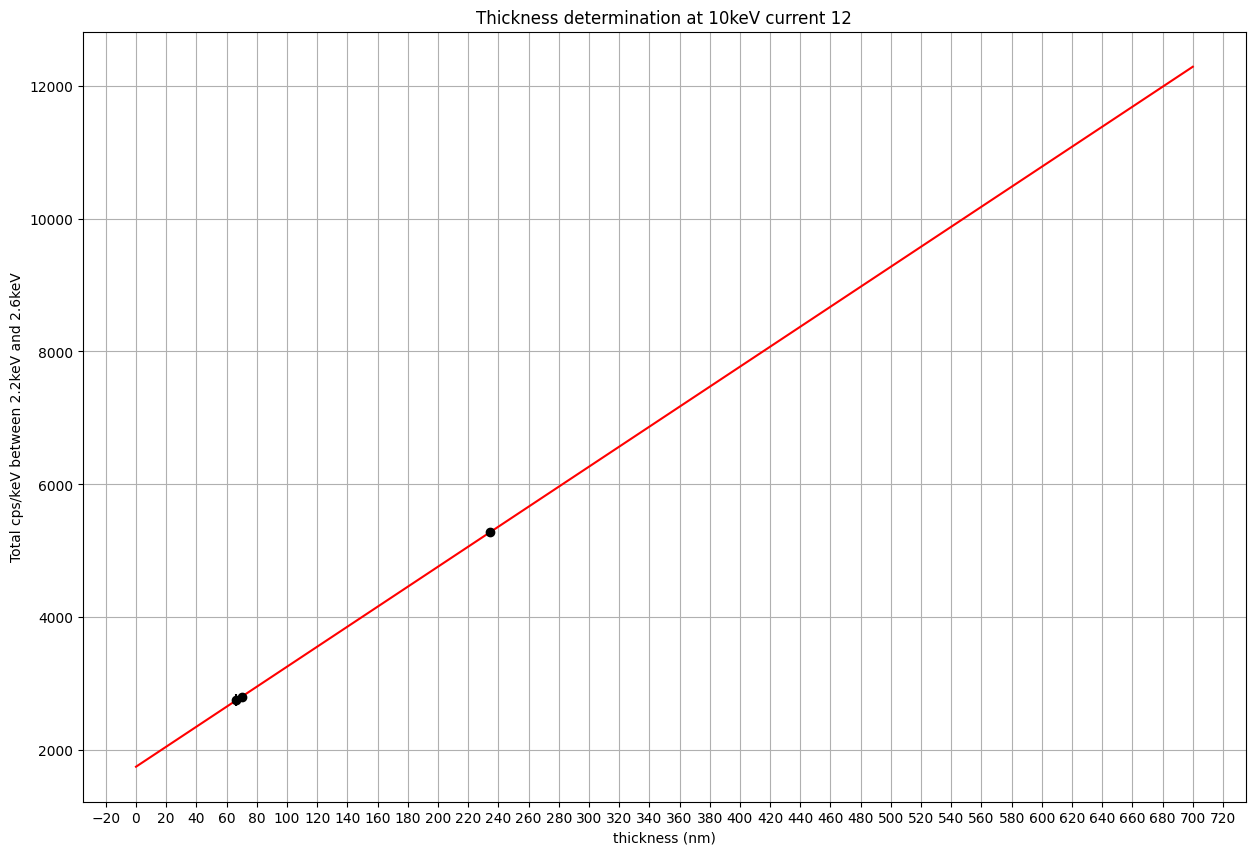

[ 6.64644842e-02 -1.16479337e+02]


In [ ]:
# Importering av datan for kalibrering av strömmen på läge 12

caldata10k14 = pd.DataFrame(columns=["tcps","thickness","thicknesserror","tcpserror"])


# C10A1_10k_current14_cal = readfile(["Calibration Calibration 14/C10_current14_Area1_1.txt","Calibration Calibration 14/C10_current14_Area1_2.txt","Calibration Calibration 14/C10_current14_Area1_3.txt"])
# caldata10k14.loc["C10 Area 1"] = [np.mean(C10A1_10k_current14_cal),5.472003e-08,2.000000e-10,(np.max(C10A1_10k_current14_cal)-np.min(C10A1_10k_current14_cal))/2]

C10A2_10k_current14_cal = readfile(["Calibration Calibration 14/C10_current14_Area2_1.txt","Calibration Calibration 14/C10_current14_Area2_2.txt","Calibration Calibration 14/C10_current14_Area2_3.txt"])
caldata10k14.loc["C10 Area 2"] = [np.mean(C10A2_10k_current14_cal),6.621983698283349e-08,2.000000e-10,(np.max(C10A2_10k_current14_cal)-np.min(C10A2_10k_current14_cal))/2]


H9_10k_current14_cal = readfile(["Calibration Calibration 14/H9_current14_1.txt","Calibration Calibration 14/H9_current14_2.txt","Calibration Calibration 14/H9_current14_3.txt"])
caldata10k14.loc["H9 Area 1"] = [np.mean(H9_10k_current14_cal),2.3437525949463097e-07,2.000000e-10,(np.max(H9_10k_current14_cal)-np.min(H9_10k_current14_cal))/2]

H12_10k_current14_cal = readfile(["Calibration Calibration 14/H12_current14_1.txt","Calibration Calibration 14/H12_current14_2.txt","Calibration Calibration 14/H12_current14_3.txt"])
caldata10k14.loc["H12 Area 1"] = [np.mean(H12_10k_current14_cal),7.019819680052666e-08,2.000000e-10,(np.max(H12_10k_current14_cal)-np.min(H12_10k_current14_cal))/2]

concurrent14 = np.polyfit(caldata10k14["thickness"].to_numpy()*10**9,caldata10k14["tcps"].to_numpy(),1)
conpcurrent14 = np.polyfit(caldata10k14["tcps"].to_numpy(),caldata10k14["thickness"].to_numpy()*10**9,1)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

# Plotting for 10keV model
ax.errorbar(caldata10k14["thickness"].to_numpy()*10**9,caldata10k14["tcps"].to_numpy(),yerr = caldata10k14["tcpserror"].to_numpy(),xerr= caldata10k14["thicknesserror"].to_numpy()*10**9,color= "black",zorder = 4,fmt="o")
ax.plot(thi,concurrent14[0]*thi+concurrent14[1],color = "red",zorder = 2)




ax.set_xlabel("thickness (nm)")
ax.set_ylabel("Total cps/keV between 2.2keV and 2.6keV")
ax.xaxis.set_major_locator(ticker.MaxNLocator(40))
ax.grid(zorder=1)
    # ax[i].legend()
    # ax[i].set_ylim((-1000,5000))
    # ax[i].set_xlim((-1,12))
ax.set_title("Thickness determination at 10keV current 12")
plt.show()
print(conpcurrent14)

[ 2.79303220e+01 -1.22823715e+00  5.45979491e+02  1.15002603e+05]


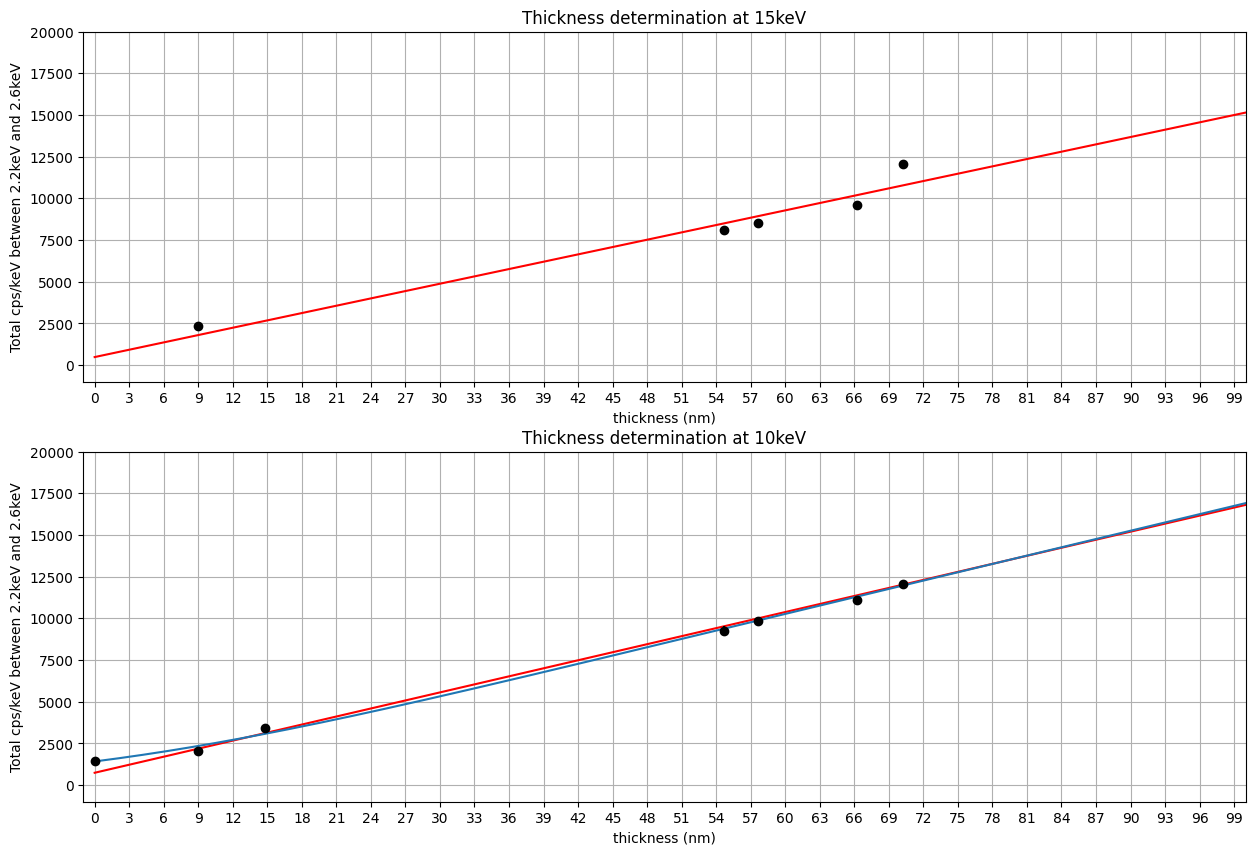

[ 4.08424332 -2.51532315 -2.64889534 -4.04951746  8.74463188 -5.25708763
  1.60874014  0.03320824]
3.617705893156225
Counts för ett lager 56.252273317535256
[ 0.00621576 -4.48010331]


In [23]:



thi = np.linspace(0,700,1000)

con10 = np.polyfit(spectraldata10["thickness"].to_numpy()*10**9,spectraldata10["tcps"].to_numpy(),1)
con15 = np.polyfit(spectraldata15["thickness"].to_numpy()*10**9,spectraldata15["tcps"].to_numpy(),1)

conp10 = np.polyfit(spectraldata10["tcps"].to_numpy(),spectraldata10["thickness"].to_numpy()*10**9,1)
conp15 = np.polyfit(spectraldata15["tcps"].to_numpy(),spectraldata15["thickness"].to_numpy()*10**9,1)

fig, ax = plt.subplots(2)
fig.set_size_inches(15,10)

def skew_normal(x, a, loc, scale,amp):
    return amp*skewnorm.cdf(x, a, loc=loc, scale=scale)

popt,pcov = sp.optimize.curve_fit(skew_normal,xdata=spectraldata10["thickness"].to_numpy()*10**9,ydata=spectraldata10["tcps"].to_numpy(),p0=[0.001,1,277.86757077762036,1])
print(popt)




# Plotting for 15keV model
ax[0].errorbar(spectraldata15["thickness"].to_numpy()*10**9,spectraldata15["tcps"].to_numpy(),yerr = spectraldata15["tcpserror"].to_numpy(),xerr= spectraldata15["thicknesserror"].to_numpy()*10**9,color= "black",zorder = 4,fmt="o")
ax[0].errorbar(spectraldata15points["thickness"].to_numpy()*10**9,spectraldata15points["tcps"].to_numpy(),yerr = spectraldata15points["tcpserror"].to_numpy(),xerr= spectraldata15points["thicknesserror"].to_numpy()*10**9,color= "black",zorder = 4,fmt="o")
ax[0].plot(thi,con15[0]*thi + con15[1], color= "red",zorder = 2)

# Plotting for 10keV model
ax[1].errorbar(spectraldata10["thickness"].to_numpy()*10**9,spectraldata10["tcps"].to_numpy(),yerr = spectraldata10["tcpserror"].to_numpy(),xerr= spectraldata10["thicknesserror"].to_numpy()*10**9,color= "black",zorder = 4,fmt="o")
ax[1].errorbar(spectraldata10points["thickness"].to_numpy()*10**9,spectraldata10points["tcps"].to_numpy(),yerr = spectraldata10points["tcpserror"].to_numpy(),xerr= spectraldata10points["thicknesserror"].to_numpy()*10**9,color= "black",zorder = 4,fmt="o")
ax[1].plot(thi,con10[0]*thi+con10[1],color = "red",zorder = 2)
ax[1].plot(thi,skew_normal(thi,*popt))


for i in range(len(ax)):
    ax[i].set_xlabel("thickness (nm)")
    ax[i].set_ylabel("Total cps/keV between 2.2keV and 2.6keV")
    ax[i].xaxis.set_major_locator(ticker.MaxNLocator(40))
    ax[i].grid(zorder=1)
    # ax[i].legend()
    ax[i].set_ylim((-1000,20000))
    ax[i].set_xlim((-1,100))
ax[0].set_title("Thickness determination at 15keV")
ax[1].set_title("Thickness determination at 10keV")
# ax[0].set_xlim([])
plt.show()
sak2 = np.subtract(predict(spectraldata15["tcps"].to_numpy(),conp15),spectraldata15["thickness"].to_numpy()*10**9)
print(sak2)
print(np.mean(np.abs(sak2)))
print("Counts för ett lager",con10[0]*0.35)
print(conp10)

[31.96130528]


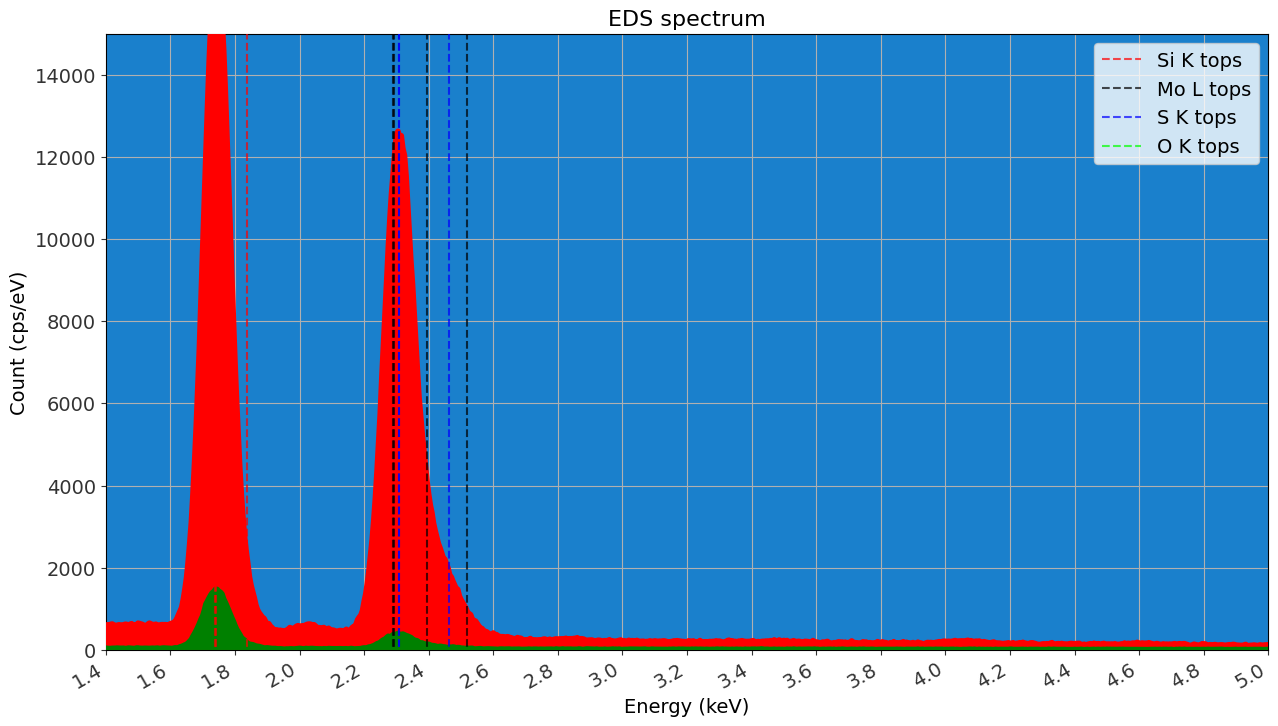

In [10]:
# Defining constants

Molines = [2.29316, 2.28985, 2.39481, 2.5183]
Silines = [1.73998,1.73938, 1.83594]
Slines = [2.30784,2.30664,2.46404]
Olines =[0.5249] 
Nticks = 20
xmax = 5
xmin = 1.4
ymax = 15000

# Creating plot figure and tick formating function
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
fmt = lambda x, pos: '{}'.format(x).rstrip('0')

print(data_integration([dataimporter("C10_12.txt")])/data_integration([dataimporter("Measurements 100724/C10_10k_100724_A2_2.txt")]))

# Plotting spectrum
plotter(ax,dataimporter("C10_12.txt"),7,"red",None)
plotter(ax,dataimporter("Measurements 100724/C10_10k_100724_A2_2.txt"),7,"green",None)
# Setting parameters for plot
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right',fontsize=14)
plt.setp(ax.get_yticklabels(),fontsize=14)
ax.xaxis.set_major_locator(ticker.MaxNLocator(Nticks))
ax.grid(zorder = 1)
ax.set_xlim([xmin,xmax])
ax.set_ylim([0,ymax])
ax.set_facecolor((0.1, 0.5, 0.8))
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(colors=(0.2, 0.2, 0.2), which ='both')
ax.set_xlabel("Energy (keV)",fontsize=14)
ax.set_ylabel("Count (cps/eV)",fontsize=14)
ax.set_title("EDS spectrum",fontsize=16)

ax.vlines(Silines,-1000,ymax, colors="red",linestyles="dashed", alpha = 0.7, label="Si K tops",zorder = 10)#Silicon K tops
ax.vlines(Molines,-1000,ymax, colors="black",linestyles="dashed",alpha = 0.7,label= "Mo L tops",zorder = 10)#Mo L tops
ax.vlines(Slines,-1000,ymax, colors=(0,0,1),linestyles="dashed",alpha = 0.7,label= "S K tops",zorder = 10)#S K tops
ax.vlines(Olines,-1000,ymax, colors=(0,1,0),linestyles="dashed",alpha = 0.7,label= "O K tops",zorder = 10)#S K tops
ax.legend(fontsize=14)

plt.show()

In [ ]:
#Defining model
with pm.Model() as model_10keV:
    #Normal distributed priors
    c0= pm.Normal(r'$c0$',mu=conp10[0],sigma=np.abs(conp10[0]*0.2))
    c1 = pm.Normal(r'$c1$',mu=conp10[1],sigma=np.abs(conp10[1]*0.2))
    

    #Expected value
    mu = predict(spectraldata10["tcps"].to_numpy(),[c0,c1])
    
    likelihood = pm.Normal('likelihood',mu=mu,sigma=np.mean(np.abs(spectraldata10["thicknesserror"].to_numpy()*10**9)),observed=spectraldata10["thickness"].to_numpy()*10**9)
    #likelihood = pm.Normal('likelihood',mu=mu,sigma=0.1,observed=eigenvalues_6_noice)
    
with pm.Model() as model_15keV:
    #Normal distributed priors
    c0= pm.Normal(r'$c0$',mu=conp15[0],sigma=np.abs(conp15[0]*0.2))
    c1 = pm.Normal(r'$c1$',mu=conp15[1],sigma=np.abs(conp15[1]*0.2))
    

    #Expected value
    mu = predict(spectraldata15["tcps"].to_numpy(),[c0,c1])
    
    likelihood = pm.Normal('likelihood',mu=mu,sigma=np.mean(np.abs(spectraldata15["thicknesserror"].to_numpy()*10**9)),observed=spectraldata15["thickness"].to_numpy()*10**9)
    #likelihood = pm.Normal('likelihood',mu=mu,sigma=0.1,observed=eigenvalues_6_noice)

In [ ]:
#Code to run the calculations
with model_15keV:
    idata_15keV = pm.sample(draws=5000,tune=10000,chains=10,cores=7, step=pm.step_methods.Slice())


Multiprocess sampling (10 chains in 7 jobs)
CompoundStep
>Slice: [$c0$]
>Slice: [$c1$]


Sampling 10 chains for 10_000 tune and 5_000 draw iterations (100_000 + 50_000 draws total) took 4 seconds.


In [ ]:
#Summary of the bayesian inference
print(conp10)
az.summary(idata_10keV,round_to=6)


[ 0.00621576 -4.48010331]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$c0$,0.006216,0.000003,0.006210,0.006222,0.000000,0.00000,11717.519143,19312.162056,1.000770
$c1$,-4.480848,0.068743,-4.607541,-4.348742,0.000636,0.00045,11682.642968,18768.714331,1.000862


In [21]:
# Plotting function for bayesian inference
def compare_prior(idata, mu, sigma, var_name = '$g_{12}$', title=None):
    if title is not None:
        labeller = az.labels.MapLabeller(var_name_map={var_name: title})
    else:
        labeller = az.labels.MapLabeller(var_name_map={var_name: var_name})

    

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1001)
    
    fig, ax = plt.subplots(1)
    fig.set_size_inches(15,8)

    fmt = lambda x, pos: '{:.6f}'.format(x)
    
   
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt))
    ax.grid()
    # ax.set_ylim()
    ax.set_facecolor((0.95, 0.95, 0.95))
    plt.subplots_adjust(wspace=0.1,hspace=0.4)
    # ax.set_xlim([x[0],x[-1]])
    ax.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='k', label='a-priori')
    # ax.plot(x, np.zeros(len(x)), color='k')
    az.plot_posterior(idata,hdi_prob="hide",ax=ax,round_to=5, var_names=var_name,label='a-posteriori')
    ax.legend(prop={'size':15}, loc='upper right')
    plt.show()


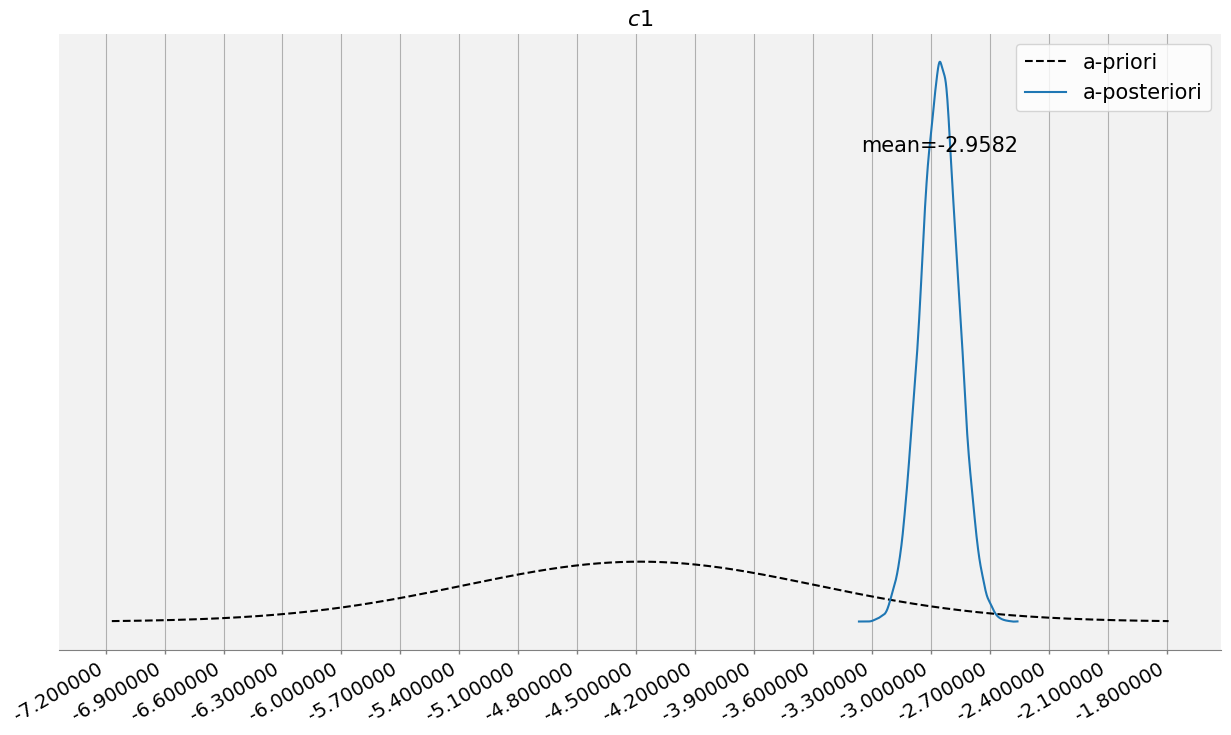

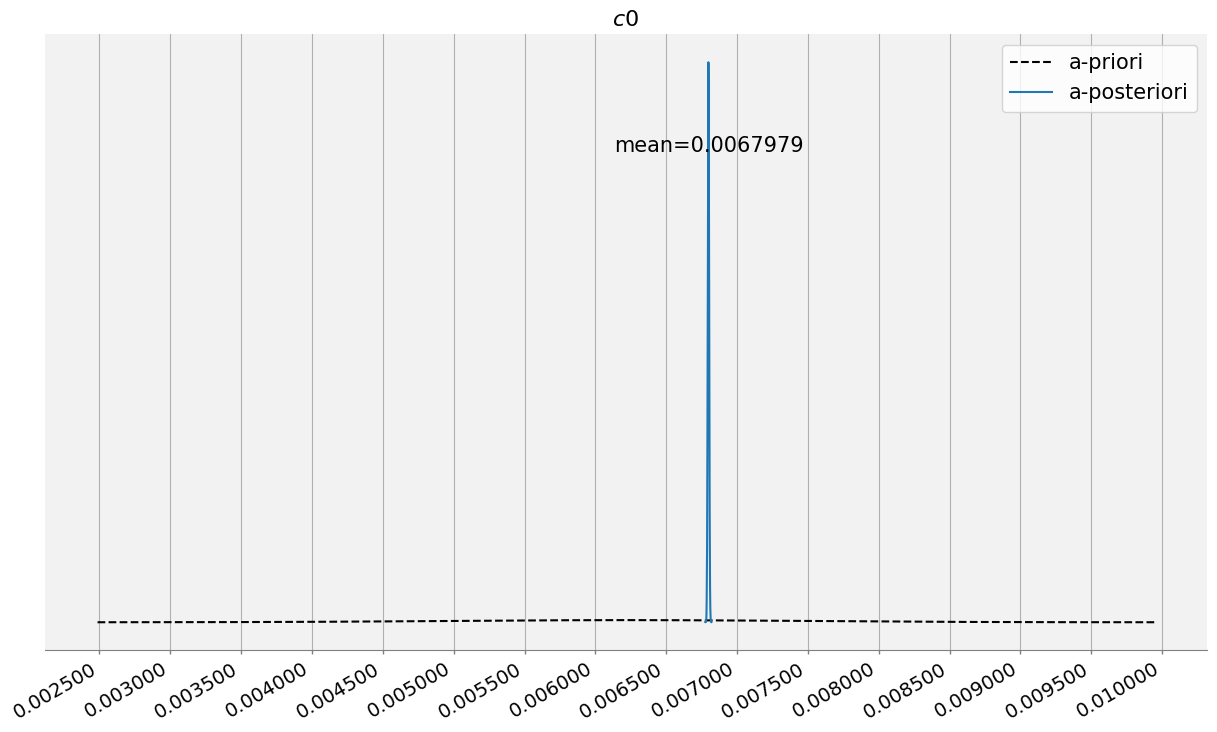

In [26]:
compare_prior(idata_15keV,conp10[1],np.abs(conp10[1]*0.2),var_name=r'$c1$')
compare_prior(idata_15keV,conp10[0],np.abs(conp10[0]*0.2),var_name=r'$c0$')